**author**: lukethompson@gmail.com<br>
**date**: 6 Mar 2017<br>
**language**: Python 3.5<br>
**conda environment**: emp-py3<br>
**license**: unlicensed<br>

## otu_prevalence.ipynb

In [1]:
import pandas as pd
import numpy as np
import locale
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
locale.setlocale(locale.LC_ALL, 'en_US')

'en_US'

In [3]:
def list_otu_studies(df, index):
    return(set([x.split('.')[0] for x in df.loc[index]['list_samples'].split(',')]))

In [4]:
locale.format("%d", 1255000, grouping=True)

'1,255,000'

## QC-filtered samples

In [5]:
path_otus = '/Users/luke.thompson/emp/analyses-otus/otu_summary.emp_deblur_90bp.qc_filtered.rare_5000.tsv'
num_samples = '24,910'
num_studies = '96'
df_otus = pd.read_csv(path_otus, sep='\t', index_col=0)
df_otus['studies'] = [list_otu_studies(df_otus, index) for index in df_otus.index]
df_otus['num_studies'] = [len(x) for x in df_otus.studies]

In [6]:
df_otus.shape

(307572, 11)

In [7]:
df_otus.num_samples.max()

9032

In [8]:
(df_otus.num_samples > 100).value_counts() / 307572

False    0.930384
True     0.069616
Name: num_samples, dtype: float64

In [9]:
(df_otus.num_studies > 10).value_counts() / 307572

False    0.949849
True     0.050151
Name: num_studies, dtype: float64

In [10]:
df_otus.num_studies.max()

88

### Per-study endemism

Objective: Determine the number of OTUs that are study-dependent (or EMPO-dependent). For a given OTU, is it found in only one study's samples or in multiple studies (Venn diagram)?

In [8]:
df_otus.num_studies.max()

88

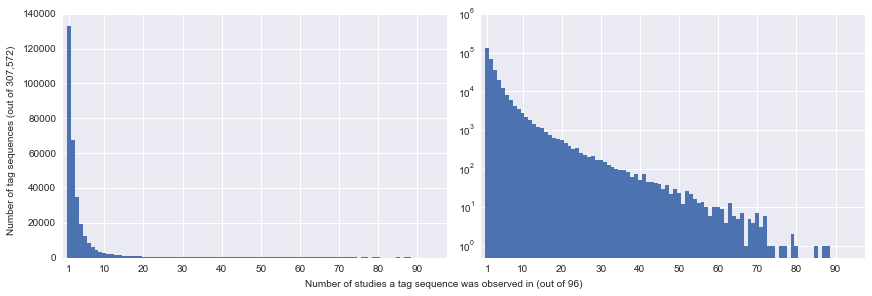

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax[0].hist(df_otus.num_studies, bins=np.concatenate(([], np.arange(1, 110, 1))))
ax[0].set_xlim([0, 98])
ax[0].set_xticks(np.concatenate((np.array([1.5]), np.arange(10.5, 92, 10))))
ax[0].set_xticklabels(['1', '10', '20', '30', '40', '50', '60', '70', '80', '90']);

ax[1].hist(df_otus.num_studies, bins=np.concatenate(([], np.arange(1, 110, 1))))
ax[1].set_yscale('log')
ax[1].set_ylim([5e-1, 1e6])
ax[1].set_xlim([0, 98])
ax[1].set_xticks(np.concatenate((np.array([1.5]), np.arange(10.5, 92, 10))))
ax[1].set_xticklabels(['1', '10', '20', '30', '40', '50', '60', '70', '80', '90']);

fig.text(0.5, 0.0, 'Number of studies a tag sequence was observed in (out of %s)' % num_studies, ha='center', va='center')
fig.text(0.0, 0.5, 'Number of tag sequences (out of %s)' % locale.format("%d", df_otus.shape[0], grouping=True), 
         ha='center', va='center', rotation='vertical')

exactly1 = df_otus.num_studies.value_counts()[1]
num_otus = df_otus.shape[0]

# fig.text(0.3, 0.51, '%s tag sequences (%.1f%%) found in only a single study\n\n\n\n\n\n%s tag sequences (%.1f%%) found in >1 study' % 
#          (locale.format("%d", exactly1, grouping=True), 
#           (exactly1/num_otus*100), 
#           locale.format("%d", num_otus-exactly1, grouping=True), 
#           ((num_otus-exactly1)/num_otus*100)), 
#          ha='center', va='center', fontsize=10)

plt.tight_layout()

#plt.savefig('/Users/luke.thompson/emp/analyses-otus/hist_endemism_90bp_qcfiltered.pdf', bbox_inches='tight')

### Per-sample endemism

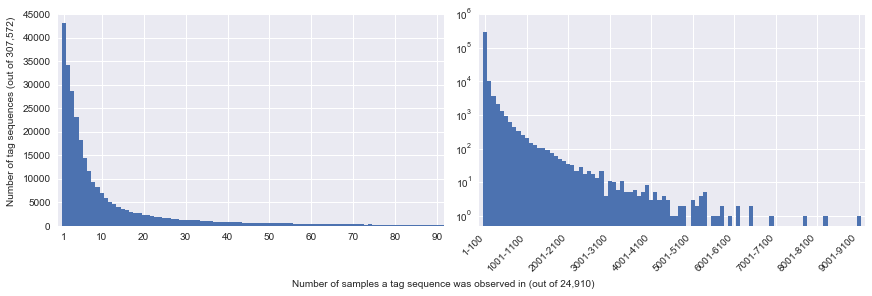

In [10]:
fig = plt.figure(figsize=(12,4))

plt.subplot(121)
mybins = np.concatenate(([], np.arange(1, 110, 1)))
n, bins, patches = plt.hist(df_otus.num_samples, bins=mybins)
plt.axis([0, 92, 0, 4.5e4])
plt.xticks(np.concatenate((np.array([1.5]), np.arange(10.5, 92, 10))), 
           ['1', '10', '20', '30', '40', '50', '60', '70', '80', '90']);

plt.subplot(122)
mybins = np.concatenate(([], np.arange(1, max(df_otus.num_samples)+100, 100)))
n, bins, patches = plt.hist(df_otus.num_samples, bins=mybins)
plt.yscale('log')
plt.axis([-100, 9200, 5e-1, 10e5])
plt.xticks([50, 1050, 2050, 3050, 4050, 5050, 6050, 7050, 8050, 9050], 
           ['1-100', '1001-1100', '2001-2100', '3001-3100', '4001-4100', 
            '5001-5100', '6001-6100', '7001-7100', '8001-8100', '9001-9100'],
           rotation=45, ha='right');

fig.text(0.5, 0.0, 'Number of samples a tag sequence was observed in (out of %s)' % num_samples, ha='center', va='center')
fig.text(0.0, 0.6, 'Number of tag sequences (out of %s)' % locale.format("%d", df_otus.shape[0], grouping=True), 
         ha='center', va='center', rotation='vertical')

exactly1 = df_otus.num_samples.value_counts()[1]
num_otus = df_otus.shape[0]

# fig.text(0.3, 0.6, '%s sequences (%.1f%%) found in only a single sample\n\n\n\n\n\n%s sequences (%.1f%%) found in >1 sample' % 
#          (locale.format("%d", exactly1, grouping=True), 
#           (exactly1/num_otus*100), 
#           locale.format("%d", num_otus-exactly1, grouping=True), 
#           ((num_otus-exactly1)/num_otus*100)), 
#          ha='center', va='center', fontsize=10)

plt.tight_layout()

#plt.savefig('/Users/luke.thompson/emp/analyses-otus/hist_otus_90bp_qcfiltered.pdf', bbox_inches='tight')

### Abundance vs. prevalence

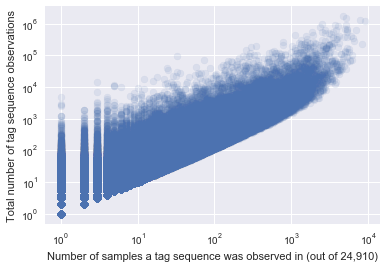

In [11]:
plt.scatter(df_otus.num_samples, df_otus.total_obs, alpha=0.1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of samples a tag sequence was observed in (out of %s)' % num_samples)
plt.ylabel('Total number of tag sequence observations')
#plt.savefig('/Users/luke.thompson/emp/analyses-otus/scatter_otus_90bp_qcfiltered.png')

## Subset 2k

In [12]:
path_otus = '~/emp/analyses-otus/otu_summary.emp_deblur_90bp.subset_2k.rare_5000.tsv'
num_samples = '2000'
df_otus = pd.read_csv(path_otus, sep='\t', index_col=0)
df_otus['studies'] = [list_otu_studies(df_otus, index) for index in df_otus.index]
df_otus['num_studies'] = [len(x) for x in df_otus.studies]

In [13]:
df_otus.num_samples.max()

614

In [14]:
df_otus.num_samples.value_counts().head()

1    66338
2    27883
3    14804
4     8913
5     6015
Name: num_samples, dtype: int64

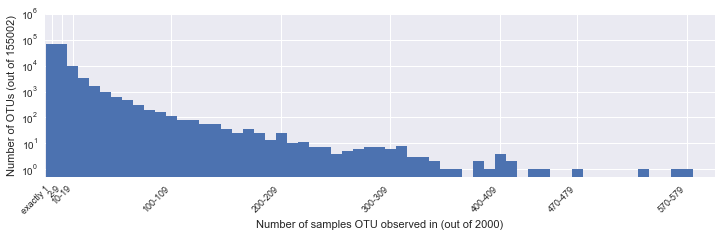

In [15]:
plt.figure(figsize=(12,3))
mybins = np.concatenate(([-8.99, 1.01], np.arange(10, max(df_otus.num_samples), 10)))
n, bins, patches = plt.hist(df_otus.num_samples, bins=mybins)
plt.yscale('log')
plt.axis([-10, 600, 5e-1, 1e6])
plt.xticks([-4, 5.5, 15.5, 104.5, 204.5, 304.5, 404.5, 474.5, 574.5], 
           ['exactly 1', '2-9', '10-19', '100-109', '200-209', '300-309', '400-409', '470-479', '570-579'], 
           rotation=45, ha='right', fontsize=9);
plt.xlabel('Number of samples OTU observed in (out of %s)' % num_samples)
plt.ylabel('Number of OTUs (out of %s)' % df_otus.shape[0])
#plt.savefig('/Users/luke.thompson/emp/analyses-otus/hist_otus_90bp_subset2k.pdf')

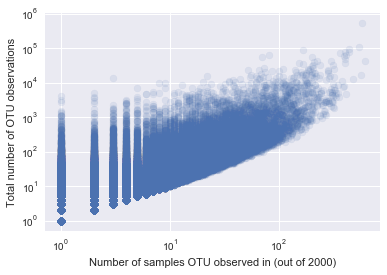

In [16]:
plt.scatter(df_otus.num_samples, df_otus.total_obs, alpha=0.1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of samples OTU observed in (out of %s)' % num_samples)
plt.ylabel('Total number of OTU observations')
#plt.savefig('/Users/luke.thompson/emp/analyses-otus/scatter_otus_90bp_subset2k.png')

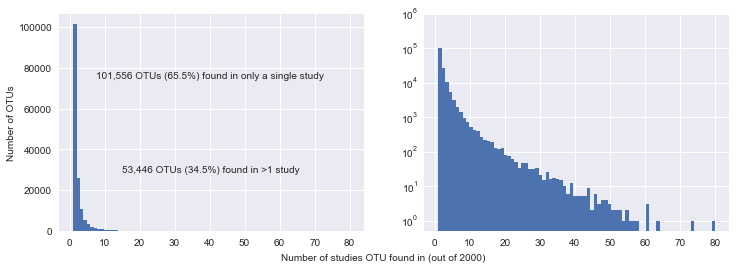

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax[0].hist(df_otus.num_studies, bins=df_otus.num_studies.max())

ax[1].hist(df_otus.num_studies, bins=df_otus.num_studies.max())
ax[1].set_yscale('log')
ax[1].set_ylim([5e-1, 1e6])

fig.text(0.5, 0.03, 'Number of studies OTU found in (out of %s)' % num_samples, ha='center', va='center')
fig.text(0.07, 0.5, 'Number of OTUs', ha='center', va='center', rotation='vertical')

exactly1 = df_otus.num_studies.value_counts()[1]
num_otus = df_otus.shape[0]

fig.text(0.3, 0.5, '%s OTUs (%.1f%%) found in only a single study\n\n\n\n\n\n\n\n\n%s OTUs (%.1f%%) found in >1 study' % 
         (locale.format("%d", exactly1, grouping=True), 
          (exactly1/num_otus*100), 
          locale.format("%d", num_otus-exactly1, grouping=True), 
          ((num_otus-exactly1)/num_otus*100)), 
         ha='center', va='center', fontsize=10)

#plt.savefig('/Users/luke.thompson/emp/analyses-otus/hist_endemism_90bp_subset2k.pdf')